In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile

In [2]:
labeled_nuclei = tifffile.imread(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/06102023_HS-18-11250-1B_TOP_HS-19-6647-1B_BTM/level_3/segmentation/HS-18-11250-1B_06102023_nuclei_segmentation.tif'
)

labeled_cells = tifffile.imread(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/06102023_HS-18-11250-1B_TOP_HS-19-6647-1B_BTM/level_3/segmentation/HS-18-11250-1B_06102023_cell_segmentation.tif'
)

labeled_nuclei.shape, labeled_cells.shape

((31000, 25920), (31000, 25920))

In [7]:
r1, r2, c1, c2 = 16000, 17000, 16000, 17000
nuclei_tile = labeled_nuclei[r1:r2, c1:c2]
cells_tile = labeled_cells[r1:r2, c1:c2]

nuclei_tile.shape, cells_tile.shape

((1000, 1000), (1000, 1000))

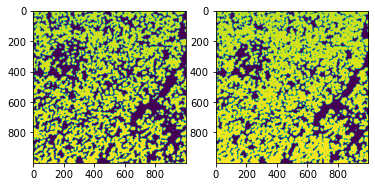

In [8]:
fig, axs = plt.subplots(ncols=2)

axs[0].imshow(nuclei_tile)
axs[1].imshow(cells_tile)

In [9]:
np.unique(nuclei_tile)

array([     0, 307410, 307648, ..., 337251, 337273, 337274], dtype=int64)

In [15]:
idx = np.random.choice(np.unique(nuclei_tile)[1:], size=1)[0]
print(idx)

313789


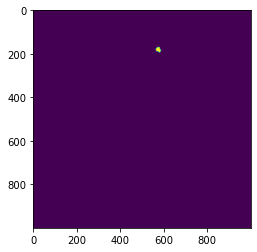

In [16]:
plt.imshow(nuclei_tile==idx)

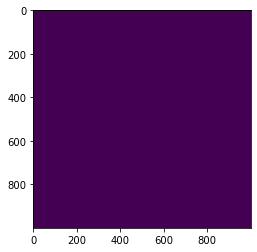

In [17]:
plt.imshow(cells_tile==idx)

In [20]:
nuclei_idxs = np.unique(nuclei_tile)[1:]
cell_idxs = np.unique(cells_tile)[1:]

print('overlapping ids', len(set.intersection(set(nuclei_idxs), set(cell_idxs))))
print('different ids', len(set.difference(set(nuclei_idxs), set(cell_idxs))))

overlapping ids 104
different ids 1916


In [24]:
nuclei_small = nuclei_tile[:5, :5]
cells_small = cells_tile[:5, :5]

nuclei_small.shape, cells_small.shape

((5, 5), (5, 5))

In [25]:
nuclei_small

array([[307965, 307965, 307648, 307648, 307648],
       [307965, 307965, 307648, 307648, 307648],
       [307965, 307965, 307648, 307648, 307648],
       [307965, 307965, 307965, 307648, 307648],
       [307965, 307965, 307965, 307648, 307648]], dtype=int64)

In [26]:
cells_small

array([[314336, 314336, 314060, 314060, 314060],
       [314336, 314336, 314060, 314060, 314060],
       [314336, 314336, 314060, 314060, 314060],
       [314336, 314336, 314336, 314060, 314060],
       [314336, 314336, 314336, 314060, 314060]], dtype=int64)